# Python Assignment 3

⏱⏱⏱**Due: 11/02/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace. **Please include all outputs in your notebook, including plots, printouts, etc..**

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

##**For Questions 2a and 2b, you can choose one of them to complete, if you completed both, only Questions 2a will be graded.**

**This assignment is out of 150 points; surplus points can be applied to other assignments (including Matlab and C/C++). However, it cannot be applied to your final project grade, and your assignment grade will not excced 75% of your total grade.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, **include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.** Do not submit a compressed file (.rar, .zip, etc..), submit files separately.

If you are tasked with implementing a numerical algorithm, it is expected that you would not rely on pre-existing methods. For example, if you were asked to solve $Ax=b$, you should write your own program to solve, not just by calling numpy.linalg.solve.



## 2a. Numerical Integration (30 pts)

For a domain discretized into $N$ equally spaced panels:
$$
\Delta x=\frac{b-a}{N}.
$$
The approximation to the integral is
$$\begin{aligned}
\int_a^b f(x) d x & \approx \frac{\Delta x}{2} \sum_{k=1}^N\left(f\left(x_{k-1}\right)+f\left(x_k\right)\right) \\
& =\frac{\Delta x}{2}\left(f\left(x_0\right)+2 f\left(x_1\right)+2 f\left(x_2\right)+2 f\left(x_3\right)+\cdots+2 f\left(x_{N-1}\right)+f\left(x_N\right)\right) \\
& =\Delta x\left(\sum_{k=1}^{N-1} f\left(x_k\right)+\frac{f\left(x_N\right)+f\left(x_0\right)}{2}\right) .
\end{aligned}$$
This is the trapezoid rule scheme.


Given the function $f(x) = 3x^2 + 2x +2$, your tasks are:

1. Carry out the integration symbolically using the SymPy library. Output the result (i.e. print out the result).
2. Implement the trapezoid rule to estimate the integral $\int_{-4}^6 f(x) dx$ using the following values of $N = 10, 20, 40, 80, 160, 320, 640, 1280$. Output the results (i.e. print out the results).
3. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against N.





Symbolic integration result: 320
Approximation for N=10: 325.000000000000
Approximation for N=20: 321.250000000000
Approximation for N=40: 320.312500000000
Approximation for N=80: 320.078125000000
Approximation for N=160: 320.019531250000
Approximation for N=320: 320.004882812500
Approximation for N=640: 320.001220703125
Approximation for N=1280: 320.000305175781


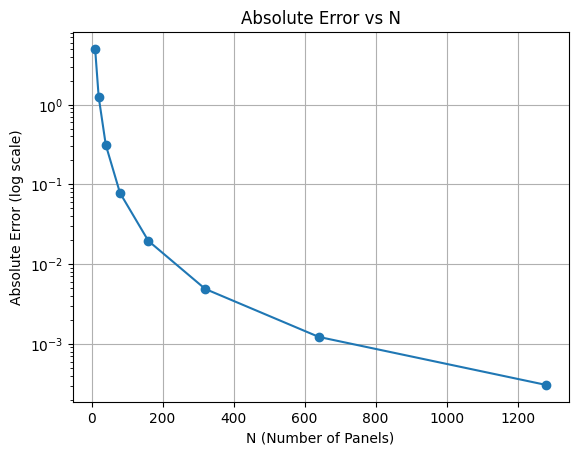

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbolic variable
x = sp.symbols('x')

# Define the function
f = 3*x**2 + 2*x + 2

# Symbolic integration using SymPy
integral_exact = sp.integrate(f, (x, -4, 6))

print("Symbolic integration result:", integral_exact)

# Implement the trapezoid rule
def trapezoid_rule(N):
    a = -4
    b = 6
    delta_x = (b - a) / N
    x_values = np.linspace(a, b, N + 1)
    sum_terms = [f.subs(x, x_values[0]) + f.subs(x, x_values[N])]
    sum_terms.extend([2 * f.subs(x, x_values[i]) for i in range(1, N)])
    integral_approx = (delta_x / 2) * sum(sum_terms)
    return integral_approx

# Values of N to use
N_values = [10, 20, 40, 80, 160, 320, 640, 1280]

# Calculate and print the trapezoid rule approximations
approximations = []
for N in N_values:
    integral_approx = trapezoid_rule(N)
    approximations.append(integral_approx)
    print(f"Approximation for N={N}: {integral_approx}")

# Calculate absolute errors
absolute_errors = [abs(approx - integral_exact) for approx in approximations]

# Plot the absolute errors
plt.figure()
plt.plot(N_values, absolute_errors, marker='o')
plt.yscale('log')
plt.xlabel('N (Number of Panels)')
plt.ylabel('Absolute Error (log scale)')
plt.title('Absolute Error vs N')
plt.grid(True)
plt.show()


## 2b. Numerical Differentiation (30 pts)

Your tasks:
1. Find the closed form expression of $f_{xy}(x,y)$, i.e. $\frac{d^2}{dxdy}f(x,y)$, for $f(x,y) = \left(sin^2\left(x\right)e^xcos(y)\right)$ using `sympy`. Output the result.
2. Find $f_{xy}(2,3)$ with `sympy` and take 15 significant digits, use it as the "groud truth solution". Output the result.
3. Approximate $f_{xy}(2,3)$ using central difference approximation for the following values of $h = 0.1, 0.01, 0.001, 0.0001$. Output the results.
4. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against the step size $h$. `plt.gca().invert_xaxis() ` might help.

Recall from the lecture:
$$f_{x y}(x, y) \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}.$$
For simplicity, we set $k = h$.

## 3. Pandas I (15 pts)

1. Create a 3x4 (3 rows by 4 columns) pandas DataFrame with the columns named after the following Long Island towns: Hempstead, Babylon, Islip, and Brookhaven. The rows represent 'Population in 2099', 'Population in 2300', 'Population in 2400'. Fill each of the 12 cells in the DataFrame with a random integer from 1000 to 10000, inclusive. `np.random.randint()` might be helpful.
For Example:

```
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2931     8043   8414        8661
Population in 2300       5444     9227   7393        8007
Population in 2400       1660     7977   4730        2940
```



2. Output the following:
  - The entire DataFrame.
  - The value in the cell of row #1 (indexing starts with 0) under the Hempstead column.

3. Add a new column named Riverhead. Populate this column with the sum of the respective row values from the Islip and Brookhaven columns. Output the entire DataFrame again.

In [ ]:
import pandas as pd
import numpy as np

# Create a 3x4 DataFrame with random integers
towns = ['Hempstead', 'Babylon', 'Islip', 'Brookhaven']
years = ['Population in 2099', 'Population in 2300', 'Population in 2400']

data = np.random.randint(1000, 10001, size=(3, 4))
df = pd.DataFrame(data, columns=towns, index=years)

# Output the entire DataFrame
print("The entire DataFrame:")
print(df)

# Output the value in the cell of row #1 under the Hempstead column
cell_value = df.at['Population in 2300', 'Hempstead']
print("\nThe value in the cell of row #1 under the Hempstead column:", cell_value)

# Add a new column named Riverhead
df['Riverhead'] = df['Islip'] + df['Brookhaven']

# Output the entire DataFrame with the new Riverhead column
print("\nThe DataFrame with the Riverhead column:")
print(df)


The entire DataFrame:
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2518     1954   4836        2073
Population in 2300       8067     8838   2092        3450
Population in 2400       3562     5800   6263        4219

The value in the cell of row #1 under the Hempstead column: 8067

The DataFrame with the Riverhead column:
                    Hempstead  Babylon  Islip  Brookhaven  Riverhead
Population in 2099       2518     1954   4836        2073       6909
Population in 2300       8067     8838   2092        3450       5542
Population in 2400       3562     5800   6263        4219      10482


## 4. Pandas II (15 pts)

0. Download the cvs file that comes with this assignment, and read it into a dataframe. You can also download this [csv file](https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv) with this link.
1. Arrange the data in alphabetical order based on the last name. Display the first few rows.
2. Count the number of customers whose subscription date is in 2021 (2021-01-01 to 2021-12-31). Report this number (e.g. print).

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path
file_path = 'https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Sort the data by last name (assuming 'Last Name' is the column name)
df.sort_values(by='Last Name', inplace=True)

# Display the first few rows of the sorted DataFrame
print("First few rows sorted by last name:")
print(df.head())

# Count the number of customers with a subscription date in 2021
start_date = '2021-01-01'
end_date = '2021-12-31'
mask = (df['Subscription Date'] >= start_date) & (df['Subscription Date'] <= end_date)
count_2021_subscribers = df[mask].shape[0]

print("\nNumber of customers with a subscription date in 2021:", count_2021_subscribers)


First few rows sorted by last name:
    Index      Customer Id First Name Last Name                Company  \
67     68  a014Ec1b9FccC1E        Tom  Alvarado    Donaldson-Dougherty   
96     97  CeD220bdAaCfaDf       Lynn  Atkinson  Ware, Burns and Oneal   
92     93  aAb6AFc7AfD0fF3     Collin     Ayers          Lamb-Peterson   
0       1  DD37Cf93aecA6Dc     Sheryl    Baxter        Rasmussen Group   
15     16  8cad0b4CBceaeec    Miranda   Beasley     Singleton and Sons   

                City    Country             Phone 1                Phone 2  \
67  South Sophiaberg   Kiribati  (585)606-2980x2258      730-797-3594x5614   
96      New Bradview  Sri Lanka     +1-846-706-2218           605.413.3198   
92      South Lonnie   Anguilla    404-645-5351x012  001-257-582-8850x8516   
0       East Leonard      Chile        229.077.5154       397.884.0519x718   
15      Desireeshire       Oman    540.085.3135x185  +1-600-462-6432x21881   

                            Email Subscription Dat

## 5. LU decomposition (50 + 30 pts)


Part A (50 points)
1. Write a function `LUdecomposition()` that takes as input a matrix $A\in \mathbb{R}^{n \times n}$. Perform Gaussian Elimination to have this function return two matrices $L$ and $U$ such that $A=LU$.
2. Your function should raise any relevant errors, for example, raise an error if a pure LU decomposition does not exist for $A$ (meaning that you have to perform pivoting, i.e., permutation of rows).
3. Create several random matrices for the purpose of testing your function. Obtain the $L$ and $U$ matrices, and for each random matrix obtain its L and U matrices and perform a matrix multiplication (`np.matmul()`) to determine whether the outcome closely resembles the original matrix $A$, allowing for slight differences attributable to precision errors.


Note: LU decomposition with Gaussian elimination should be covered in your undergraduate linear algebra class. It is also covered in AMS 510. If you do not know how, this 10 minute [video](https://www.youtube.com/watch?v=UlWcofkUDDU&ab_channel=Mathispower4u) explains it very well.

Part B (30 bonus points)
4. Not all square matrices have a pure LU decomposition. However, PLU decomposition always exists. Write another function `pivoting()` that takes as input a matrix $A$ and return the permutation/pivoting matrix $P$ such that $PA$ always has a pure LU decomposition.
5. Find an example $A$ for which `LUdecomposition()` raises an error. Then, use `pivoting()` to find $P$, and find the pure LU decomposition of $PA$. Verify that indeed $PA = LU$ with matrix multiplication (`np.matmul()`).


Hint: Please do not print out a giant matrix and visually examine the outcomes. Think of a way to verify your results and output a boolean value.


In [4]:
import numpy as np

def LUdecomposition(A):
    n = A.shape[0]
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for k in range(n):
        L[k][k] = 1  # Diagonal of L is set to 1
        for j in range(k, n):
            U[k][j] = A[k][j]
            for i in range(k):
                U[k][j] -= L[k][i] * U[i][j]

        for i in range(k + 1, n):
            L[i][k] = A[i][k]
            for j in range(k):
                L[i][k] -= L[i][j] * U[j][k]
            L[i][k] /= U[k][k]

    return L, U

def pivoting(A):
    n = A.shape[0]
    P = np.eye(n)
    for k in range(n):
        max_index = np.argmax(np.abs(A[k:, k])) + k
        if k != max_index:
            P[[k, max_index]] = P[[max_index, k]]
            A[[k, max_index]] = A[[max_index, k]]
    return P

def verify_decomposition(A, L, U):
    return np.allclose(A, np.dot(L, U))

# Part A
for _ in range(3):  # Generate and test 3 random matrices
    A = np.random.rand(4, 4)  # Change the size as needed
    L, U = LUdecomposition(A)
    result = verify_decomposition(A, L, U)
    print(f"LU Decomposition verification result: {result}")

# Part B
A = np.array([[0, 1], [1, 0]])  # Example where LU decomposition raises an error
try:
    L, U = LUdecomposition(A)
except Exception as e:
    print("Error:", e)

P = pivoting(A)
PA = np.dot(P, A)
L, U = LUdecomposition(PA)
result = verify_decomposition(PA, L, U)
print(f"PA = LU verification result: {result}")


LU Decomposition verification result: True
LU Decomposition verification result: True
LU Decomposition verification result: True
PA = LU verification result: False


<ipython-input-4-0fd03b7e1586>:19: RuntimeWarning: divide by zero encountered in double_scalars
  L[i][k] /= U[k][k]


Fact: LU and PLU decompositions are not unique.

## 6. Markov Chain (30 pts)

**BACKGROUND:** Consider a Markov chain transition matrix $P$ on a set of $n$ states, where $P_{i j}$ corresponds to the probability $\left(0 \leq P_{i j} \leq 1\right)$ to go from state $i$ to the state $j$, and each row is normalized so that
$$
\sum_{j=1}^n P_{i j}=1 .
$$

Let $p$ be a size- $n$ vector composed of the probability distribution over the $n$ states, where
$$
\sum_{j=1}^n p_j=1 .
$$

The transition rule corresponding to the transition matrix $P$ is $\hat{p}=P^T p$, where $\hat{p}$ corresponds to a new probability distribution and
$$
\sum_{j=1}^n \hat{p}_j=1 .
$$
TASK: Write a program that works with 5 states `only use the numpy library`. In particular,
0. Fix the random seed to be the last digit of your id: `numpy.random.seed()`.

1. Construct a random $5 \times 5$ matrix $P$, and normalize each row so that
$$
\sum_{j=1}^5 P_{i j}=1 .
$$

2. Construct a random size-5 vector $p$ and normalize it so that
$$
\sum_{j=1}^5 p_j=1 .
$$
Apply the transition rule 50 times to obtain $p_{50}$.
3. Compute the eigenvector $v$ of $P^T$ corresponding to the eigenvalue 1 (and numerically, the eigenvalue closest to $1)$, and then scale the eigenvector so that
$$
\sum_{j=1}^5 v_j=1 .
$$
This scaled eigenvector is known as the stationary distribution.

4. Compute the component wise difference between $p_{50}$ and the stationary distribution. Do they match with each other within $1 \mathrm{e}-5$ ?

HINTS: You may find the following functions useful in your implementation:
- np.random.rand
- np.dot
- np.linalg.eig

In [5]:
import numpy as np

# Set random seed based on the last digit of your ID
np.random.seed(5)  # Change the seed to match your last digit

# Step 2: Create a random 5x5 matrix P
P = np.random.rand(5, 5)

# Step 3: Normalize each row of matrix P
P = P / P.sum(axis=1, keepdims=True)

# Step 4: Create a random size-5 vector p
p = np.random.rand(5)

# Step 5: Normalize vector p
p = p / p.sum()

# Step 6: Apply the transition rule 50 times
for _ in range(50):
    p = np.dot(P.T, p)

# Step 7: Compute the eigenvector corresponding to eigenvalue 1
eigenvalues, eigenvectors = np.linalg.eig(P.T)
stationary_index = np.argmin(np.abs(eigenvalues - 1))
stationary_vector = eigenvectors[:, stationary_index]

# Step 8: Scale the stationary vector
stationary_vector = stationary_vector / stationary_vector.sum()

# Step 9: Compute the component-wise difference and check if they match within 1e-5
difference = np.abs(p - stationary_vector)
match = np.all(difference < 1e-5)

print("Component-wise difference between p50 and stationary distribution:")
print(difference)
print("Do they match within 1e-5? ", match)


Component-wise difference between p50 and stationary distribution:
[1.11022302e-16 5.55111512e-17 1.94289029e-16 2.77555756e-17
 8.32667268e-17]
Do they match within 1e-5?  True
